In [32]:
# Import Modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
from bokeh.plotting import figure

In [9]:
daily_df = pd.read_csv(Path("/Users/thunguyen/Documents/Fintech/project2/Resources/Merged Daily Data.csv"))

In [10]:
daily_df.head()

,Unnamed: 0,Dates,Canadian Dollar ($CADUSD) - Rate Value,Canada Prime Rate (%PRC1) - Rate Value,United States Prime Rate - Rate Value,Crude Oil (NYMEX:^CL) - Day Close Price,S&P 500 (^SPX) - Index Value,S&P/TSX Composite Index (^GSPTSE) - Index Value
0,0,Mar-30-1983,1.23,11.5,10.5,29.40,153.39,2141.95
1,1,Mar-31-1983,1.23,11.5,10.5,29.29,152.96,2156.06
2,2,Apr-04-1983,1.24,11.5,10.5,29.44,153.02,2156.05
3,3,Apr-05-1983,1.24,11.5,10.5,29.71,151.89,2154.71
4,4,Apr-06-1983,1.23,11.5,10.5,29.90,151.04,2151.10


In [11]:
# Setting the Date column as index
daily_df = daily_df.set_index("Dates")

daily_df.head()

,Unnamed: 0,Canadian Dollar ($CADUSD) - Rate Value,Canada Prime Rate (%PRC1) - Rate Value,United States Prime Rate - Rate Value,Crude Oil (NYMEX:^CL) - Day Close Price,S&P 500 (^SPX) - Index Value,S&P/TSX Composite Index (^GSPTSE) - Index Value
Dates,,,,,,,
Mar-30-1983,0,1.23,11.5,10.5,29.40,153.39,2141.95
Mar-31-1983,1,1.23,11.5,10.5,29.29,152.96,2156.06
Apr-04-1983,2,1.24,11.5,10.5,29.44,153.02,2156.05
Apr-05-1983,3,1.24,11.5,10.5,29.71,151.89,2154.71
Apr-06-1983,4,1.23,11.5,10.5,29.90,151.04,2151.10


In [12]:
# Dropping NaN from dataframe
daily_df = daily_df.apply (pd.to_numeric, errors='coerce')
daily_df = daily_df.dropna()

daily_df.head()

,Unnamed: 0,Canadian Dollar ($CADUSD) - Rate Value,Canada Prime Rate (%PRC1) - Rate Value,United States Prime Rate - Rate Value,Crude Oil (NYMEX:^CL) - Day Close Price,S&P 500 (^SPX) - Index Value,S&P/TSX Composite Index (^GSPTSE) - Index Value
Dates,,,,,,,
Mar-30-1983,0,1.23,11.5,10.5,29.40,153.39,2141.95
Mar-31-1983,1,1.23,11.5,10.5,29.29,152.96,2156.06
Apr-04-1983,2,1.24,11.5,10.5,29.44,153.02,2156.05
Apr-05-1983,3,1.24,11.5,10.5,29.71,151.89,2154.71
Apr-06-1983,4,1.23,11.5,10.5,29.90,151.04,2151.10


In [13]:
# Split data into features and target variable
X = daily_df[['Canada Prime Rate (%PRC1) - Rate Value', 'United States Prime Rate - Rate Value', 'Crude Oil (NYMEX:^CL) - Day Close Price', 'S&P 500 (^SPX) - Index Value', 'S&P/TSX Composite Index (^GSPTSE) - Index Value']]
y = daily_df['Canadian Dollar ($CADUSD) - Rate Value']

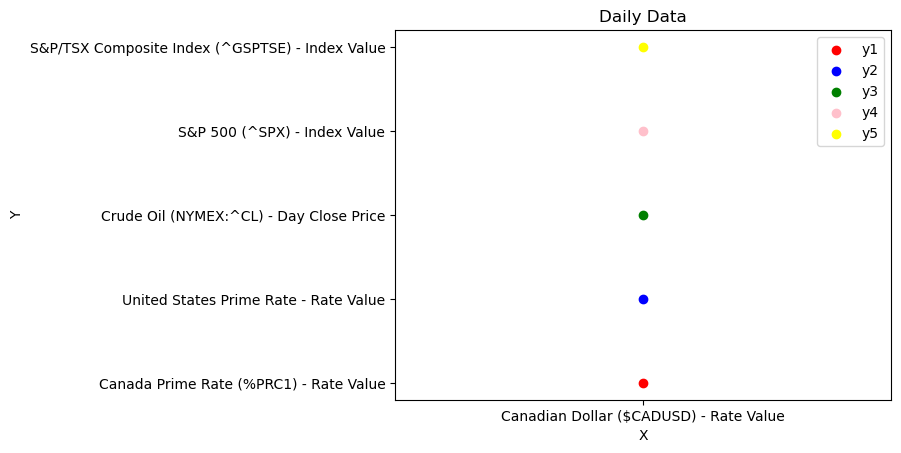

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# create a sample dataset
daily_df = pd.DataFrame({
    'x': ['Canadian Dollar ($CADUSD) - Rate Value'],
    'y1': ['Canada Prime Rate (%PRC1) - Rate Value'],
    'y2': ['United States Prime Rate - Rate Value'],
    'y3': ['Crude Oil (NYMEX:^CL) - Day Close Price'],
    'y4': ['S&P 500 (^SPX) - Index Value'],
    'y5': ['S&P/TSX Composite Index (^GSPTSE) - Index Value']
           })

# create a scatter plot with multiple columns
plt.scatter(daily_df['x'], daily_df['y1'], color='red', label='y1')
plt.scatter(daily_df['x'], daily_df['y2'], color='blue', label='y2')
plt.scatter(daily_df['x'], daily_df['y3'], color='green', label='y3')
plt.scatter(daily_df['x'], daily_df['y4'], color='pink', label='y4')
plt.scatter(daily_df['x'], daily_df['y5'], color='yellow', label='y5')

# add legend, title and axis labels
plt.legend()
plt.title('Daily Data')
plt.xlabel('X')
plt.ylabel('Y')

# show the plot
plt.show()


In [28]:
 # Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [33]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [34]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R^2:', r2)

MSE: 0.0009632429087158336
R^2: 0.9576394540117232


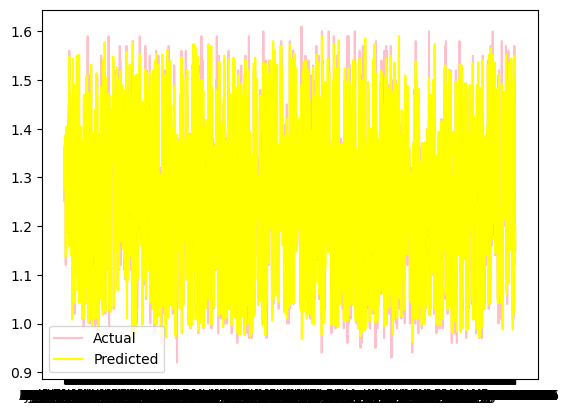

In [41]:
plt.plot(y_test, label="Actual", color='pink')
plt.plot(y_pred, label='Predicted', color='yellow')
plt.legend()
plt.show()